In [1]:
import numpy as np
import pandas as pd
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt

In [2]:
# Load data, remove country label, and convert to np array
data = pd.read_csv('food-consumption.csv')
Anew = data.iloc[:,1:]
Anew = np.array(Anew)
m,n = Anew.shape

# Standardize prior to PCA
stdA = np.std(Anew, axis=0)
Anew = Anew @ np.diag(np.ones(n)/stdA)
Anew = Anew.T

# Apply PCA
mu = np.mean(Anew, axis=1)
xc = Anew - mu[:, None]
C = np.dot(xc, xc.T)/m

k = 2
lambd, w = ssl.eigs(C)
lambd = lambd.real
w = w.real

dim1 = np.dot(w[:,0].T,xc)/np.sqrt(lambd[0])
dim2 = np.dot(w[:,1].T,xc)/np.sqrt(lambd[1])

Text(0.5, 1.0, 'PCA - Countries')

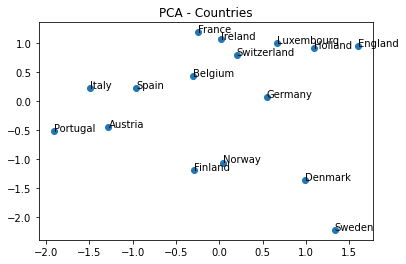

In [3]:
# Plot reduced-dimension data by country
fig, ax = plt.subplots()
ax.scatter(dim1,dim2)

for i, country in enumerate(data.iloc[:,0]):
    ax.annotate(country, (dim1[i],dim2[i]))
    
plt.title('PCA - Countries')

In [4]:
# Do PCA with the foods as the data points and the countries as the attributes
data = pd.read_csv('food-consumption.csv', header=None, index_col=0).T

Anew = data.iloc[:,1:]
Anew = np.array(Anew, dtype=int)
m,n = Anew.shape

# Standardize prior to PCA
stdA = np.std(Anew, axis=0)
Anew = Anew @ np.diag(np.ones(n)/stdA)
Anew = Anew.T

# Apply PCA
mu = np.mean(Anew, axis=1)
xc = Anew - mu[:, None]
C = np.dot(xc, xc.T)/m

k = 2
lambd, w = ssl.eigs(C)
lambd = lambd.real
w = w.real

dim1 = np.dot(w[:,0].T,xc)/np.sqrt(lambd[0])
dim2 = np.dot(w[:,1].T,xc)/np.sqrt(lambd[1])

Text(0.5, 1.0, 'PCA - Food Items')

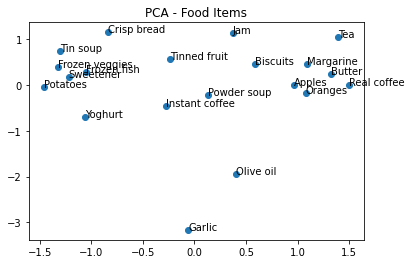

In [5]:
# Plot reduced-dimension data by food
fig, ax = plt.subplots()
ax.scatter(dim1,dim2)

for i, food in enumerate(data.iloc[:,0]):
    ax.annotate(food, (dim1[i],dim2[i]))
    
plt.title('PCA - Food Items')